In [1]:
! pip3 install --upgrade --user google-cloud-aiplatform pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 22.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 49.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 49.3 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
PROJECT = !gcloud config get-value project
PROJECT_ID = PROJECT[0]
LOCATION = "us-central1"

In [2]:
from IPython.display import Markdown, display
from vertexai.preview.generative_models import (
    Content,
    GenerationConfig,
    GenerationResponse,
    GenerativeModel,
    Image,
    Part,
)
from vertexai.language_models import TextEmbeddingModel

In [3]:
model = GenerativeModel("gemini-pro-vision")
text_embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko@001")

In [4]:
import os
import urllib.request
import sys

if not os.path.exists("utils"):
    os.makedirs("utils")


# download the helper scripts from utils folder
url_prefix = "https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/retrieval-augmented-generation/utils/"
files = ["intro_multimodal_rag_utils.py"]

for fname in files:
    urllib.request.urlretrieve(f"{url_prefix}/{fname}", filename=f"utils/{fname}")


In [5]:
# download documents and images used in this lab
!gsutil -m rsync -r gs://github-repo/rag/intro_multimodal_rag .
print("Download completed")

Building synchronization state...
Starting synchronization...
Copying gs://github-repo/rag/intro_multimodal_rag/data/gemini_v1_5_report_technical.pdf...
Copying gs://github-repo/rag/intro_multimodal_rag/class_a_share.png...          
Copying gs://github-repo/rag/intro_multimodal_rag/data/Google Cloud TPU blog.pdf...
Copying gs://github-repo/rag/intro_multimodal_rag/data/google-10k-sample-part1.pdf...
Copying gs://github-repo/rag/intro_multimodal_rag/data/2022-alphabet-annual-report.pdf...
Copying gs://github-repo/rag/intro_multimodal_rag/data/med_gemini.pdf...        
Copying gs://github-repo/rag/intro_multimodal_rag/data/alphafold_research_paper.pdf...
Copying gs://github-repo/rag/intro_multimodal_rag/data/tactic_ai_paper.pdf...   
Copying gs://github-repo/rag/intro_multimodal_rag/data/gemma_technical_paper.pdf...
Copying gs://github-repo/rag/intro_multimodal_rag/data/google-10k-sample-part2.pdf...
Copying gs://github-repo/rag/intro_multimodal_rag/data/the-ethics-of-advanced-ai-assist

In [6]:
from utils.intro_multimodal_rag_utils import get_document_metadata

In [39]:
# Specify the PDF path
pdf_path = "google-10k-sample-14pages.pdf"

# Specify the image description prompt. Change it
image_description_prompt = """Explain what is going on in the image.
If it's a table, extract all elements of the table.
If it's a graph, explain the findings in the graph.
Do not include any numbers that are not mentioned in the image:"""

# Extract text and image metadata from the PDF document
text_metadata_df = get_document_metadata(
    PROJECT_ID,
    model,
    pdf_path,
   # image_save_dir="https://2d00c17c7b0cb103-dot-us-central1.notebooks.googleusercontent.com/lab/tree/images",
   image_description_prompt=image_description_prompt,
    embedding_size=1408,
 #   text_emb_text_limit=1000,  # Set text embedding input text limit to 1000 char
)

image_metadata_df = get_document_metadata(
    PROJECT_ID,
    model,
    pdf_path,
    image_save_dir="images",
    image_description_prompt=image_description_prompt,
    embedding_size=1408,
   # text_emb_text_limit=1000,  # Set text embedding input text limit to 1000 char
)


print("--- Completed processing. ---")

TypeError: unsupported operand type(s) for +: 'GenerativeModel' and 'str'

In [9]:
text_metadata_df.head()

NameError: name 'text_metadata_df' is not defined

In [10]:
image_metadata_df.head()

NameError: name 'image_metadata_df' is not defined

In [11]:
from utils.intro_multimodal_rag_utils import (
    get_similar_text_from_query,
    print_text_to_text_citation,
    get_similar_image_from_query,
    print_text_to_image_citation,
    get_gemini_response,
    display_images,
)

In [12]:
query = "I need details for basic and diluted net income per share of Class A, Class B, and Class C share for google?"

In [13]:
# Matching user text query with "chunk_embedding" to find relevant chunks.
matching_results_text = get_similar_text_from_query(
    PROJECT_ID,
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=3,
    embedding_size=1408,
    chunk_text=True,
)

# Print the matched text citations
print_text_to_text_citation(matching_results_text, print_top=True, chunk_text=True)


NameError: name 'text_metadata_df' is not defined

In [14]:
matching_results_image = get_similar_image_from_query(
    PROJECT_ID,
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",  # Use image description text embedding
    image_emb=False,  # Use text embedding instead of image embedding
    top_n=3,
    embedding_size=1408,
)

# Markdown(print_text_to_image_citation(matching_results_image, print_top=True))
print("\n **** Result: ***** \n")

# Display the top matching image
display(matching_results_image[0]["image_object"])

NameError: name 'text_metadata_df' is not defined

In [15]:
## you can check the citations to probe further.
## check the "image description:" which is a description extracted through gemini which helped search our query.
Markdown(print_text_to_image_citation(matching_results_image, print_top=True))

NameError: name 'matching_results_image' is not defined

***Input image from user:***


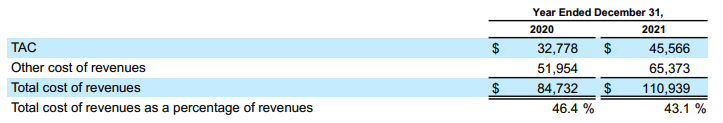

In [16]:
# You can find a similar image as per the images you have in the metadata.
# In this case, you have a table (picked from the same document source) and you would like to find similar tables in the document.
image_query_path = "tac_table_revenue.png"

# Print a message indicating the input image
print("***Input image from user:***")

# Display the input image
Image.load_from_file(image_query_path)

In [17]:
# Search for Similar Images Based on Input Image and Image Embedding

matching_results_image = get_similar_image_from_query(
    PROJECT_ID,
    text_metadata_df,
    image_metadata_df,
    query=query,  # Use query text for additional filtering (optional)
    column_name="mm_embedding_from_img_only",  # Use image embedding for similarity calculation
    image_emb=True,
    image_query_path=image_query_path,  # Use input image for similarity calculation
    top_n=3,  # Retrieve top 3 matching images
    embedding_size=1408,  # Use embedding size of 1408
)

print("\n **** Result: ***** \n")

# Display the Top Matching Image
display(
    matching_results_image[0]["image_object"]
)  # Display the top matching image object (Pillow Image)


NameError: name 'text_metadata_df' is not defined

In [18]:
# Display citation details for the top matching image
print_text_to_image_citation(
    matching_results_image, print_top=True
)  # Print citation details for the top matching image

NameError: name 'matching_results_image' is not defined

In [19]:
# Check Other Matched Images (Optional)
# You can access the other two matched images using:

print("---------------Matched Images------------------\n")
display_images(
    [
        matching_results_image[0]["img_path"],
        matching_results_image[1]["img_path"],
    ],
    resize_ratio=0.8,
)

---------------Matched Images------------------



NameError: name 'matching_results_image' is not defined

***Input image from user:***


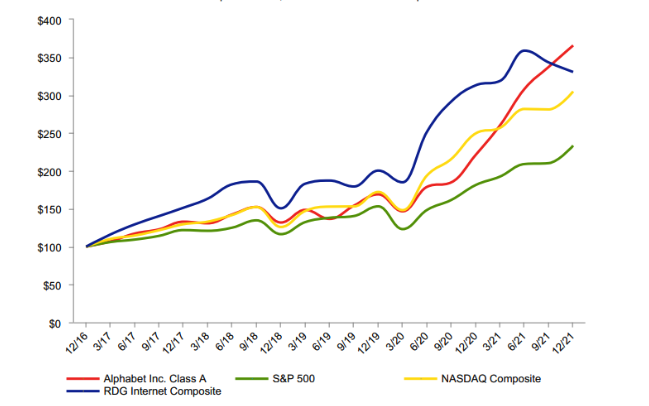

In [20]:
image_query_path = "class_a_share.png"

# Print a message indicating the input image
print("***Input image from user:***")

# Display the input image
Image.load_from_file(image_query_path)

In [21]:
# Load the input image using Pillow
user_image_object = Image.load_from_file(image_query_path)

# Define the comparison query
compare_query = """Question: How has nasdaq performed with respect to Class A and Class B shares of Google?
Answer: """
instructions = """instructions: Compare two images and base your reasoning only on the images provided.
Provide detail reasoning of your conclusions.
Images: """

# Find similar images based on the input image
image_selected_based_on_source_image = get_similar_image_from_query(
    PROJECT_ID,
    text_metadata_df,
    image_metadata_df,
    image_query_path=image_query_path,
    column_name="mm_embedding_from_img_only",
    image_emb=True,
    top_n=3,
    embedding_size=1408,
)

# Select the best matching image from the search results
selected_image_object = image_selected_based_on_source_image[0]["image_object"]

# Prepare the model input
model_input = [instructions, user_image_object, selected_image_object, compare_query]

# Generate Gemini response with streaming output
Markdown(get_gemini_response(model, model_input=model_input, stream=True))


NameError: name 'text_metadata_df' is not defined

In [22]:
Image.load_from_file(image_selected_based_on_source_image[0]["img_path"])

NameError: name 'image_selected_based_on_source_image' is not defined

In [23]:
# citations
print_text_to_image_citation(image_selected_based_on_source_image, print_top=True)

NameError: name 'image_selected_based_on_source_image' is not defined

In [24]:
# this time we are not passing any images, but just a simple text query.

query = """Question: How has nasdaq and s&p performed with respect to class A shares and class C shares?
Which one would be better to buy and why?
Answer: """

# query = """Question: Find the total revenues and other related financial numbers for Alphabet
# Answer: """


In [25]:
# Retrieve relevant chunks of text based on the query
matching_results_chunks_data = get_similar_text_from_query(
    PROJECT_ID,
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=5,
    embedding_size=1408,
    chunk_text=True,
)

NameError: name 'text_metadata_df' is not defined

In [26]:
# Get all relevant images based on user query
matching_results_image_fromdescription_data = get_similar_image_from_query(
    PROJECT_ID,
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",
    image_emb=False,
    top_n=3,
    embedding_size=1408,
)

NameError: name 'text_metadata_df' is not defined

In [27]:
# combine all the selected relevant text chunks
context_text = []
for key, value in matching_results_chunks_data.items():
    context_text.append(value["chunk_text"])
final_context_text = "\n".join(context_text)

# combine all the relevant images and their description generated by Gemini
context_images = []
for key, value in matching_results_image_fromdescription_data.items():
    context_images.extend(
        ["Image: ", value["image_object"], "Caption: ", value["image_description"]]
    )


NameError: name 'matching_results_chunks_data' is not defined

In [28]:
instructions = """The context of extraction of detail should be based on the text context given in "text_context" and Image context given in "image_context" along with its Caption: \n
Base your response on "text_context" and "image_context". Do not use any numbers or percentages that are not present in the "image_context".
Do not include any cumulative total return in the answer. Context:
"""

final_prompt = [
    query,
    instructions,
    "text_context:",
    "\n".join(context_text),
    "image_context:",
]
final_prompt.extend(context_images)

NameError: name 'context_images' is not defined

In [29]:
Markdown(get_gemini_response(model, model_input=final_prompt, stream=True))

InvalidArgument: 400 Unable to submit request because it has an empty text parameter. Add a value to the parameter and try again. Learn more: https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/gemini

In [30]:
print("---------------Matched Images------------------\n")
display_images(
    [
        matching_results_image_fromdescription_data[0]["img_path"],
        matching_results_image_fromdescription_data[1]["img_path"],
    ],
    resize_ratio=0.8,
)

---------------Matched Images------------------



NameError: name 'matching_results_image_fromdescription_data' is not defined

In [31]:
# Image citations. You can check how Gemini generated metadata helped in grounding the answer.

print_text_to_image_citation(
    matching_results_image_fromdescription_data, print_top=False
)

NameError: name 'matching_results_image_fromdescription_data' is not defined

In [32]:
# Text citations

print_text_to_text_citation(
    matching_results_chunks_data,
    print_top=False,
    chunk_text=True,
)

NameError: name 'matching_results_chunks_data' is not defined